In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [38]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # ***************************************************
    # get k'th subgroup in test, others in train: 
    # ***************************************************

    other_indices = []
    for i in range(0, len(k_indices)):
        if i!=k:
            for j in range(0, len(k_indices[i])):
                other_indices.append(k_indices[i][j])
            
    x_k =   np.array([ x[i] for i in k_indices[k]])
    x_tr =  np.array([ x[i] for i in other_indices])

    y_k =   np.array([ y[i] for i in k_indices[k]])
    y_tr =  np.array([ y[i] for i in other_indices])
    
    # ***************************************************
    # form data with polynomial degree:
    # ***************************************************
    basis_matrix_data_tr = build_poly(x_tr, degree)
    basis_matrix_data_k  = build_poly(x_k , degree)

    # ***************************************************
    # ridge regression:
    # ***************************************************    
    
    w = ridge_regression(y_tr, basis_matrix_data_tr, lambda_, degree)
    
    # ***************************************************
    # calculate the loss for train and test data:
    # ***************************************************

    N = len(y)
    second_term = lambda_*np.linalg.norm(w)**2
    loss_tr = 1/(2*N)*np.sum((y_tr-np.dot(basis_matrix_data_tr, w))**2)+second_term
    loss_te = 1/(2*N)*np.sum((y_k -np.dot(basis_matrix_data_k , w))**2)+second_term
    return loss_tr, loss_te

IndexError: index 4 is out of bounds for axis 0 with size 4

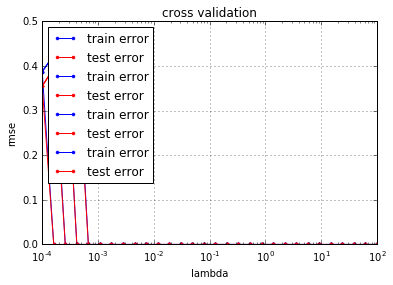

In [57]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    #print(k_indices)
    
    # define lists to store the loss of training data and test data
    losses_tr = np.zeros((k_fold, len(lambdas)))
    losses_te = np.zeros((k_fold, len(lambdas)))

    rmse_tr = np.zeros((k_fold, len(lambdas)))
    rmse_te = np.zeros((k_fold, len(lambdas)))

    #NB: we are iterating to find out which lamdba performs better
    #looking at 4 different training sets
    for l,lambda_ in enumerate(lambdas):
        for k in range(0,k_fold):
            losses_tr[k][l], losses_te[k][l] = cross_validation(y,x,k_indices, k, lambda_, degree)
            rmse_tr[k][l] = np.sqrt(losses_tr[k][l])
            rmse_te[k][l] = np.sqrt(losses_te[k][l])
            #print("Lamdba={l}, k={k}, loss_tr={ltr}, loss_te={lte}".format(
            #     l=lambda_, k=k, ltr=losses_tr[k][l], lte=losses_te[k][l]))
         
    # ***************************************************
    # cross validation:
    # ***************************************************
    mean_rmse_tr = np.zeros((len(lambdas)))
    mean_rmse_te = np.zeros((len(lambdas)))
    for l in range(0,len(lambdas)):
        mean_rmse_tr[l] = np.mean(rmse_tr[:][l].T)
        mean_rmse_te[l] = np.mean(rmse_te[:][l].T)
        cross_validation_visualization(lambdas, mean_rmse_tr, mean_rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()